In [2]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

In [3]:

import pickle
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
import numpy as np

### I'm trying again with a bigger rating dataset. I'm using 500 fics instead of 300. I also made sure they were english and different fandoms so character names aren't the main things that rating is based off of. They were mainly using the romance tag because I think those categories tend to make sure they're rating their fic correctly.
### I also removed "Not Rated" feature becasue I thought it would make things confusing


In [4]:
# let's read in our flower data...
# 
# for read_csv, use header=0 when row 0 is a header row
# 
filename = 'rating.csv'
df = pd.read_csv(filename)        # encoding="utf-8" et al.
print(f"{filename} : file read into a pandas dataframe.")

rating.csv : file read into a pandas dataframe.


In [5]:
#
# a dataframe is a "spreadsheet in Python"   (seems to have an extra column!)
#
# let's view it!
df

,work_id,title,author,rating,category,fandom,relationship,character,additional tags,language,...,status date,words,chapters,comments,kudos,bookmarks,hits,all_kudos,all_bookmarks,body
0,36043723,Let's Talk About Dinosaurs,['hihellotya'],Mature,M/M,aekhephuue`nkhrabephuue`n | Bad Buddy: the Ser...,Ohm Pawat Chittsawangdee/Nanon Korapat Kirdpan...,"Ohm Pawat Chittsawangdee, Nanon Korapat Kirdpa...","doctor and archaeologists, Romance, I'm Bad At...",English,...,2022-04-07,22412,10/?,25.0,74.0,7.0,1931,"['Purple_passiflora', 'tazparrow', 'coffeecup7...",[],Notes:\n\n \n\nNyasasaurus Pirringtoni is beli...
1,37775314,Resurrected,['BlueClanMarkings'],Explicit,F/M,Mass Effect Trilogy,Female Shepard/Garrus Vakarian,"Garrus Vakarian, Tali'Zorah nar Rayya, Miranda...","Infiltrator (Mass Effect), Normandy-SR2, Mass ...",English,...,2022-04-07,127885,15/?,19.0,42.0,4.0,951,"['Consumeroffanfics', 'lgiu', 'marantonia', 'D...",[],I opened my eyes and stared at a white ceiling...
2,35885656,Silent Night ~ Christmas Eve with Severus Snap...,['Prince_Sev'],Mature,F/M,Harry Potter - J. K. Rowling,"Severus Snape/Reader, Severus Snape/You, Sever...",Severus Snape,"Christmas, Christmas Fluff, Holidays, One Shot...",English,...,2022-04-07,13306,8/?,32.0,58.0,10.0,1031,"['sunsilverstar18', 'melyllvlol', 'Loyallonewo...",[],\n\n\nChristmas. Your favourite time of year....
3,38222218,Flower Day,['ceeloveswriting'],General Audiences,F/M,"Zhou Shu Hui Zhan | Jujutsu Kaisen (Manga), Z...","Fushiguro Megumi/Original Female Character(s),...",Fushiguro Megumi,"Alternate Universe, Reincarnation, Soulmates, ...",English,...,2022-04-07,1231,1/1,NaN,NaN,NaN,0,[],[],It comes in a split second where their eyes me...
4,38222215,Proximity,['Pire'],General Audiences,F/M,Pu nohiroakademia | Boku no Hero Academia | My...,"Amajiki Tamaki/Hadou Nejire, Amajiki Tamaki & ...","Hadou Nejire, Amajiki Tamaki","Tamajire, Tamaneji, Nejitama - Freeform, Slow ...",English,...,2022-04-07,1125,1/1,NaN,NaN,NaN,0,[],[],He stopped suddenly as he passed the living ro...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,37478167,Days in Violet,['artemiswrites'],Mature,F/F,"Hawkeye (TV 2021), Marvel Cinematic Universe, ...","Yelena Belova/Kate Bishop, Yelena Belova & Kat...","Yelena Belova, Kate Bishop, Eleanor Bishop (Ma...","victorian au, Lesbian Yelena Belova, Kate is f...",English,...,2022-04-06,39693,6/15,250.0,356.0,51.0,6171,"['Uft', 'theatregleek77', 'noStoriesWithout', ...",[],\n (See the end of the chapter for n...
501,33516574,I can treat you better,['Writer1987'],Teen And Up Audiences,M/M,"Sonic the Hedgehog - All Media Types, Sonic th...",Scourge the Hedgehog/Zonic the Zone Cop,"Scourge the Hedgehog, Zonic the Zone Cop","Tooth-Rotting Fluff, Romantic Fluff, Hurt/Comf...",English,...,2022-04-06,2706,1/1,2.0,18.0,2.0,177,"['PiperRose90', 'scarletcamelia24', 'RyanNatha...",[],Zonic walked down the hallway of one of the pr...
502,37295128,"From Today On, I Start Anew",['Larkawolfgirl'],Explicit,"M/M, Multi",Kyou Kara Maou!,"Wolfram von Bielefeld/Shibuya Yuuri, Murata Ke...","Shibuya Yuuri, Wolfram von Bielefeld, Murata K...","Alternate Universe - Time Travel, Alternate Ca...",English,...,2022-04-06,71521,17/?,39.0,77.0,8.0,1428,"['Ren_chan_the_otaku', 'yuume03', 'NagisaFujiw...",[],Tragedy strikes\n\n\nI wake up to the sound of...
503,27594695,Melodies at Midnight,['Somebodys_Nightmare'],Explicit,F/M,"Final Fantasy VII Remake (Video Game 2020), Fi...","Tifa Lockhart/Cloud Strife, Tifa Lockhart & Cl...","Tifa Lockhart, Cloud Strife, Denzel (Compilati...","Angst, Heavy Angst, Past Zerith, canon complia...",English,...,2022-04-06,266067,17/17,377.0,512.0,81.0,24649,"['juju7442', 'jta1433', 'TifaTheMonk', 'Lonely...",[],Hello!\n\nThanks for stopping by to read this!...


In [6]:
##Check they're all english
language = []
for i in range(0, len(df)):
    if df["language"][i] != "English":
        language += [i]
        
print(language)

[]


In [7]:
#
# Looking at the result, above, we see some things that need to be "tidied":
#
# [1] there's an extra column (holding the reference url)
#
#
# let's look at the dataframe's "info":
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   work_id          505 non-null    int64  
 1   title            505 non-null    object 
 2   author           505 non-null    object 
 3   rating           505 non-null    object 
 4   category         498 non-null    object 
 5   fandom           505 non-null    object 
 6   relationship     486 non-null    object 
 7   character        491 non-null    object 
 8   additional tags  505 non-null    object 
 9   language         505 non-null    object 
 10  published        505 non-null    object 
 11  status           505 non-null    object 
 12  status date      505 non-null    object 
 13  words            505 non-null    int64  
 14  chapters         505 non-null    object 
 15  comments         383 non-null    float64
 16  kudos            470 non-null    float64
 17  bookmarks       

In [8]:
ROW = 0
COLUMN = 1
df_clean2 = df.drop(['language', 'published', 'all_kudos', 'all_bookmarks', 'bookmarks', 'comments', 'words', 'status', 'status date'], axis=COLUMN)
df_clean2 

,work_id,title,author,rating,category,fandom,relationship,character,additional tags,chapters,kudos,hits,body
0,36043723,Let's Talk About Dinosaurs,['hihellotya'],Mature,M/M,aekhephuue`nkhrabephuue`n | Bad Buddy: the Ser...,Ohm Pawat Chittsawangdee/Nanon Korapat Kirdpan...,"Ohm Pawat Chittsawangdee, Nanon Korapat Kirdpa...","doctor and archaeologists, Romance, I'm Bad At...",10/?,74.0,1931,Notes:\n\n \n\nNyasasaurus Pirringtoni is beli...
1,37775314,Resurrected,['BlueClanMarkings'],Explicit,F/M,Mass Effect Trilogy,Female Shepard/Garrus Vakarian,"Garrus Vakarian, Tali'Zorah nar Rayya, Miranda...","Infiltrator (Mass Effect), Normandy-SR2, Mass ...",15/?,42.0,951,I opened my eyes and stared at a white ceiling...
2,35885656,Silent Night ~ Christmas Eve with Severus Snap...,['Prince_Sev'],Mature,F/M,Harry Potter - J. K. Rowling,"Severus Snape/Reader, Severus Snape/You, Sever...",Severus Snape,"Christmas, Christmas Fluff, Holidays, One Shot...",8/?,58.0,1031,\n\n\nChristmas. Your favourite time of year....
3,38222218,Flower Day,['ceeloveswriting'],General Audiences,F/M,"Zhou Shu Hui Zhan | Jujutsu Kaisen (Manga), Z...","Fushiguro Megumi/Original Female Character(s),...",Fushiguro Megumi,"Alternate Universe, Reincarnation, Soulmates, ...",1/1,NaN,0,It comes in a split second where their eyes me...
4,38222215,Proximity,['Pire'],General Audiences,F/M,Pu nohiroakademia | Boku no Hero Academia | My...,"Amajiki Tamaki/Hadou Nejire, Amajiki Tamaki & ...","Hadou Nejire, Amajiki Tamaki","Tamajire, Tamaneji, Nejitama - Freeform, Slow ...",1/1,NaN,0,He stopped suddenly as he passed the living ro...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,37478167,Days in Violet,['artemiswrites'],Mature,F/F,"Hawkeye (TV 2021), Marvel Cinematic Universe, ...","Yelena Belova/Kate Bishop, Yelena Belova & Kat...","Yelena Belova, Kate Bishop, Eleanor Bishop (Ma...","victorian au, Lesbian Yelena Belova, Kate is f...",6/15,356.0,6171,\n (See the end of the chapter for n...
501,33516574,I can treat you better,['Writer1987'],Teen And Up Audiences,M/M,"Sonic the Hedgehog - All Media Types, Sonic th...",Scourge the Hedgehog/Zonic the Zone Cop,"Scourge the Hedgehog, Zonic the Zone Cop","Tooth-Rotting Fluff, Romantic Fluff, Hurt/Comf...",1/1,18.0,177,Zonic walked down the hallway of one of the pr...
502,37295128,"From Today On, I Start Anew",['Larkawolfgirl'],Explicit,"M/M, Multi",Kyou Kara Maou!,"Wolfram von Bielefeld/Shibuya Yuuri, Murata Ke...","Shibuya Yuuri, Wolfram von Bielefeld, Murata K...","Alternate Universe - Time Travel, Alternate Ca...",17/?,77.0,1428,Tragedy strikes\n\n\nI wake up to the sound of...
503,27594695,Melodies at Midnight,['Somebodys_Nightmare'],Explicit,F/M,"Final Fantasy VII Remake (Video Game 2020), Fi...","Tifa Lockhart/Cloud Strife, Tifa Lockhart & Cl...","Tifa Lockhart, Cloud Strife, Denzel (Compilati...","Angst, Heavy Angst, Past Zerith, canon complia...",17/17,512.0,24649,Hello!\n\nThanks for stopping by to read this!...


In [9]:
## visualize some data
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
import altair as alt
alt.renderers.enable("notebook")

# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")


sns.set_theme(style="darkgrid")
ax = sns.countplot(y="rating", data=df_clean2)

ValueError: 
To use the 'notebook' renderer, you must install the vega package
and the associated Jupyter extension.
See https://altair-viz.github.io/getting_started/installation.html
for more information.


In [ ]:
# \r and \n
df_clean2['Content_Parsed_1'] = df_clean2['body'].str.replace("\r", " ")
df_clean2['Content_Parsed_1'] = df_clean2['Content_Parsed_1'].str.replace("\n", " ")
df_clean2['Content_Parsed_1'] = df_clean2['Content_Parsed_1'].str.replace("\t", " ")
df_clean2['Content_Parsed_1'] = df_clean2['Content_Parsed_1'].str.replace("    ", " ")

In [ ]:
df_clean2["Content_Parsed_1"][1]

'I opened my eyes and stared at a white ceiling. Blurry vision. Trouble focusing. Beeping in the background. Equipment everywhere.  "She\'s reacting to outside stimuli. Showing an awareness of her surroundings. Oh my god, Miranda. I think she\'s waking up." Someone said in the background.  A woman walked over to me. She had mid-length black hair, pale blue eyes and was wearing a skin-tight white bodysuit with black detailing on it. She was beautiful. Was this Miranda? A beeping noise became more frantic in the background.  "Damn it, Wilson. She\'s not ready yet! Give her the sedative!" Miranda chastised.  A thick Australian accent. She was in charge. What was going on here? I reached towards Miranda. Begging her to tell me what was going on. She leaned in close to me. Everything was so blurry. Like talking under water.  "Shepard don\'t try to move. Just lie still. Try to stay calm." She said to me and laid my hand down next to my body.  "Heart rate still climbing. Brain activity is off

In [ ]:
# " when quoting text
df_clean2['Content_Parsed_1'] = df_clean2['Content_Parsed_1'].str.replace('"', '')

In [ ]:
# Lowercasing the text
df_clean2['Content_Parsed_2'] = df_clean2['Content_Parsed_1'].str.lower()

In [ ]:
punctuation_signs = list("?:!.,;")
df_clean2['Content_Parsed_3'] = df_clean2['Content_Parsed_2']

for punct_sign in punctuation_signs:
    df_clean2['Content_Parsed_3'] = df_clean2['Content_Parsed_3'].str.replace(punct_sign, '')

In [ ]:
df_clean2['Content_Parsed_4'] = df_clean2['Content_Parsed_3'].str.replace("'s", "")

In [ ]:
# Downloading punkt and wordnet from NLTK
nltk.download('punkt')
print("------------------------------------------------------------")
nltk.download('wordnet')

------------------------------------------------------------


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/waverlywang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/waverlywang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Saving the lemmatizer into an object
wordnet_lemmatizer = WordNetLemmatizer()

NameError: name 'WordNetLemmatizer' is not defined

In [ ]:
nrows = len(df)
lemmatized_text_list = []

for row in range(0, nrows):

    # Create an empty list containing lemmatized words
    lemmatized_list = []

    # Save the text and its words into an object
    text = df_clean2.loc[row]['Content_Parsed_4']
    text_words = text.split(" ")

    # Iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))

    # Join the list
    lemmatized_text = " ".join(lemmatized_list)

    # Append to the list containing the texts
    lemmatized_text_list.append(lemmatized_text)

In [ ]:
df_clean2['Content_Parsed_5'] = lemmatized_text_list

In [ ]:
stop_words = list(stopwords.words('english'))

In [ ]:
example = "me eating a meal"
word = "me"

# The regular expression is:
regex = r"\b" + word + r"\b"  # we need to build it like that to work properly

re.sub(regex, "StopWord", example)

'StopWord eating a meal'

In [ ]:
df_clean2['Content_Parsed_6'] = df_clean2['Content_Parsed_5']

for stop_word in stop_words:

    regex_stopword = r"\b" + stop_word + r"\b"
    df_clean2['Content_Parsed_6'] = df_clean2['Content_Parsed_6'].str.replace(regex_stopword, '')

In [ ]:
df_clean2.loc[5]['body']

'In a world were 98 percent of people are born with some sort of supernatural power, and it was called as quirks. We are about to see the life of a young boy who was born without one in the world of quirks. His name is Izuku Midoriya. He is a 14 old year boy and he was quirkless. For the past thirteen years his life was a living hell. He suffered many things that not any child should not even imagine, and it was all because he didn\'t have a mutation. \n\nHe was announced as quirkless as if it was some disease. From his former childhood best-friend to his own parents, everybody hated him. Katsuki Bakugo, has treated him like he was a dirt, and even his mother has never once even supported him or acted as a mother for him. He was not allowed to call her as mother because she was ashamed to be the mother of a quirkless boy. His father who left him and his mother at the age of 4 because he was quirkless. \n\nHe had given up on everything except his dream, because he was not the one to be 

In [ ]:
df_clean2.loc[5]['Content_Parsed_2']

"in a world were 98 percent of people are born with some sort of supernatural power, and it was called as quirks. we are about to see the life of a young boy who was born without one in the world of quirks. his name is izuku midoriya. he is a 14 old year boy and he was quirkless. for the past thirteen years his life was a living hell. he suffered many things that not any child should not even imagine, and it was all because he didn't have a mutation.   he was announced as quirkless as if it was some disease. from his former childhood best-friend to his own parents, everybody hated him. katsuki bakugo, has treated him like he was a dirt, and even his mother has never once even supported him or acted as a mother for him. he was not allowed to call her as mother because she was ashamed to be the mother of a quirkless boy. his father who left him and his mother at the age of 4 because he was quirkless.   he had given up on everything except his dream, because he was not the one to be give 

In [ ]:
df_clean2.loc[5]['Content_Parsed_3']

"in a world were 98 percent of people are born with some sort of supernatural power and it was called as quirks we are about to see the life of a young boy who was born without one in the world of quirks his name is izuku midoriya he is a 14 old year boy and he was quirkless for the past thirteen years his life was a living hell he suffered many things that not any child should not even imagine and it was all because he didn't have a mutation   he was announced as quirkless as if it was some disease from his former childhood best-friend to his own parents everybody hated him katsuki bakugo has treated him like he was a dirt and even his mother has never once even supported him or acted as a mother for him he was not allowed to call her as mother because she was ashamed to be the mother of a quirkless boy his father who left him and his mother at the age of 4 because he was quirkless   he had given up on everything except his dream because he was not the one to be give up that easily he

In [ ]:
df_clean2.loc[5]['Content_Parsed_4']

"in a world were 98 percent of people are born with some sort of supernatural power and it was called as quirks we are about to see the life of a young boy who was born without one in the world of quirks his name is izuku midoriya he is a 14 old year boy and he was quirkless for the past thirteen years his life was a living hell he suffered many things that not any child should not even imagine and it was all because he didn't have a mutation   he was announced as quirkless as if it was some disease from his former childhood best-friend to his own parents everybody hated him katsuki bakugo has treated him like he was a dirt and even his mother has never once even supported him or acted as a mother for him he was not allowed to call her as mother because she was ashamed to be the mother of a quirkless boy his father who left him and his mother at the age of 4 because he was quirkless   he had given up on everything except his dream because he was not the one to be give up that easily he

In [ ]:
df_clean2.loc[5]['Content_Parsed_5']

"in a world be 98 percent of people be bear with some sort of supernatural power and it be call as quirk we be about to see the life of a young boy who be bear without one in the world of quirk his name be izuku midoriya he be a 14 old year boy and he be quirkless for the past thirteen years his life be a live hell he suffer many things that not any child should not even imagine and it be all because he didn't have a mutation   he be announce as quirkless as if it be some disease from his former childhood best-friend to his own parent everybody hat him katsuki bakugo have treat him like he be a dirt and even his mother have never once even support him or act as a mother for him he be not allow to call her as mother because she be ashamed to be the mother of a quirkless boy his father who leave him and his mother at the age of 4 because he be quirkless   he have give up on everything except his dream because he be not the one to be give up that easily he want to help people just like al

In [ ]:
df_clean2.loc[5]['Content_Parsed_6']

"  world  98 percent  people  bear   sort  supernatural power    call  quirk     see  life   young boy   bear without one   world  quirk  name  izuku midoriya    14 old year boy    quirkless   past thirteen years  life   live hell  suffer many things    child   even imagine       '   mutation     announce  quirkless      disease   former childhood best-friend    parent everybody hat  katsuki bakugo  treat  like    dirt  even  mother  never  even support   act   mother      allow  call   mother    ashamed    mother   quirkless boy  father  leave    mother   age  4    quirkless     give   everything except  dream      one   give   easily  want  help people  like  might say   would smile  like     4 years  ua university entrance exam  (' get  work harder   want   able  get  ua      choice  quirkless) izuku think   walk  school   home  finish house chores since    payment   mother  allow   live   roof    hear  fight break   run  instead  see   fight  fight  ask   push  way   front   crowd 

In [ ]:

df_clean2['Content_Parsed_6'] = df_clean2['Content_Parsed_6'].str.replace("'", "")
##fanfiction authors use these 
df_clean2['Content_Parsed_6'] = df_clean2['Content_Parsed_6'].str.replace("=", "")
df_clean2['Content_Parsed_6'] = df_clean2['Content_Parsed_6'].str.replace("-", "")
df_clean2['Content_Parsed_6'] = df_clean2['Content_Parsed_6'].str.replace("~", "")

In [ ]:
df_clean2.loc[5]['Content_Parsed_6']

'  world  98 percent  people  bear   sort  supernatural power    call  quirk     see  life   young boy   bear without one   world  quirk  name  izuku midoriya    14 old year boy    quirkless   past thirteen years  life   live hell  suffer many things    child   even imagine          mutation     announce  quirkless      disease   former childhood bestfriend    parent everybody hat  katsuki bakugo  treat  like    dirt  even  mother  never  even support   act   mother      allow  call   mother    ashamed    mother   quirkless boy  father  leave    mother   age  4    quirkless     give   everything except  dream      one   give   easily  want  help people  like  might say   would smile  like     4 years  ua university entrance exam  ( get  work harder   want   able  get  ua      choice  quirkless) izuku think   walk  school   home  finish house chores since    payment   mother  allow   live   roof    hear  fight break   run  instead  see   fight  fight  ask   push  way   front   crowd    

In [ ]:
list_columns = ["title", "rating", "fandom", "body", "Content_Parsed_6"]
df_clean2 = df_clean2[list_columns]

df_clean2 = df_clean2.rename(columns={'Content_Parsed_6': 'Content_Parsed'})

In [ ]:
df_clean2

,title,rating,fandom,body,Content_Parsed
0,Let's Talk About Dinosaurs,Mature,aekhephuue`nkhrabephuue`n | Bad Buddy: the Ser...,Notes:\n\n \n\nNyasasaurus Pirringtoni is beli...,note nyasasaurus pirringtoni believe walk ...
1,Resurrected,Explicit,Mass Effect Trilogy,I opened my eyes and stared at a white ceiling...,open eye star white ceiling blurry vision...
2,Silent Night ~ Christmas Eve with Severus Snap...,Mature,Harry Potter - J. K. Rowling,\n\n\nChristmas. Your favourite time of year....,christmas favourite time year snow alread...
3,Flower Day,General Audiences,"Zhou Shu Hui Zhan | Jujutsu Kaisen (Manga), Z...",It comes in a split second where their eyes me...,come split second eye meet greenest col...
4,Proximity,General Audiences,Pu nohiroakademia | Boku no Hero Academia | My...,He stopped suddenly as he passed the living ro...,stop suddenly pass live room thirdyear d...
...,...,...,...,...,...
500,Days in Violet,Mature,"Hawkeye (TV 2021), Marvel Cinematic Universe, ...",\n (See the end of the chapter for n...,(see end chapter notes) wind ...
501,I can treat you better,Teen And Up Audiences,"Sonic the Hedgehog - All Media Types, Sonic th...",Zonic walked down the hallway of one of the pr...,zonic walk hallway one prison cell block ...
502,"From Today On, I Start Anew",Explicit,Kyou Kara Maou!,Tragedy strikes\n\n\nI wake up to the sound of...,tragedy strike wake sound thunder leas...
503,Melodies at Midnight,Explicit,"Final Fantasy VII Remake (Video Game 2020), Fi...",Hello!\n\nThanks for stopping by to read this!...,hello thank stop read fic cloti fall...


In [ ]:
rating_codes = {
    'General Audiences': 0,
    'Teen And Up Audiences': 1,
    'Mature': 2,
    'Explicit': 3,
}

In [ ]:
# Category mapping
df_clean2['Rating_Code'] = df_clean2['rating']
df_clean2 = df_clean2.replace({'Rating_Code':rating_codes})
df_clean2

,title,rating,fandom,body,Content_Parsed,Rating_Code
0,Let's Talk About Dinosaurs,Mature,aekhephuue`nkhrabephuue`n | Bad Buddy: the Ser...,Notes:\n\n \n\nNyasasaurus Pirringtoni is beli...,note nyasasaurus pirringtoni believe walk ...,2
1,Resurrected,Explicit,Mass Effect Trilogy,I opened my eyes and stared at a white ceiling...,open eye star white ceiling blurry vision...,3
2,Silent Night ~ Christmas Eve with Severus Snap...,Mature,Harry Potter - J. K. Rowling,\n\n\nChristmas. Your favourite time of year....,christmas favourite time year snow alread...,2
3,Flower Day,General Audiences,"Zhou Shu Hui Zhan | Jujutsu Kaisen (Manga), Z...",It comes in a split second where their eyes me...,come split second eye meet greenest col...,0
4,Proximity,General Audiences,Pu nohiroakademia | Boku no Hero Academia | My...,He stopped suddenly as he passed the living ro...,stop suddenly pass live room thirdyear d...,0
...,...,...,...,...,...,...
500,Days in Violet,Mature,"Hawkeye (TV 2021), Marvel Cinematic Universe, ...",\n (See the end of the chapter for n...,(see end chapter notes) wind ...,2
501,I can treat you better,Teen And Up Audiences,"Sonic the Hedgehog - All Media Types, Sonic th...",Zonic walked down the hallway of one of the pr...,zonic walk hallway one prison cell block ...,1
502,"From Today On, I Start Anew",Explicit,Kyou Kara Maou!,Tragedy strikes\n\n\nI wake up to the sound of...,tragedy strike wake sound thunder leas...,3
503,Melodies at Midnight,Explicit,"Final Fantasy VII Remake (Video Game 2020), Fi...",Hello!\n\nThanks for stopping by to read this!...,hello thank stop read fic cloti fall...,3


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_clean2['Content_Parsed'], 
                                                    df_clean2['Rating_Code'], 
                                                    test_size=0.2, 
                                                    random_state=8)

In [ ]:
# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [ ]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(404, 300)
(101, 300)


In [ ]:
from sklearn.feature_selection import chi2
import numpy as np

for Product, category_id in sorted(rating_codes.items()):
    features_chi2 = chi2(features_train, labels_train == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}' category:".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-7:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")

# 'Explicit' category:
  . Most correlated unigrams:
. lips
. harry
. sound
. fuck
. nice
. dick
. mouth
  . Most correlated bigrams:
. shake head
. look like

# 'General Audiences' category:
  . Most correlated unigrams:
. else
. kid
. harry
. door
. kiss
. boy
. fuck
  . Most correlated bigrams:
. shake head
. look like

# 'Mature' category:
  . Most correlated unigrams:
. please
. kiss
. book
. stay
. mouth
. harry
. dick
  . Most correlated bigrams:
. look like
. shake head

# 'Teen And Up Audiences' category:
  . Most correlated unigrams:
. side
. young
. open
. must
. father
. build
. worry
  . Most correlated bigrams:
. look like
. shake head



In [ ]:
bigrams

['look like', 'shake head']

### Nice these seem more correlated than the past ones...

### Knn Model

In [ ]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Cross-Validation for Hyperparameter tuning
First, we can see what hyperparameters the model has:

In [ ]:
knnc_0 =KNeighborsClassifier()

print('Parameters currently in use:\n')
pprint(knnc_0.get_params())

Parameters currently in use:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


In [ ]:
# Create the parameter grid 
n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 500, num = 100)]

param_grid = {'n_neighbors': n_neighbors}

# Create a base model
knnc = KNeighborsClassifier()

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=knnc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46,
                                         51, 56, 61, 66, 71, 76, 81, 86, 91, 96,
                                         101, 106, 111, 116, 121, 127, 132, 137,
                                         142, 147, ...]},
             scoring='accuracy', verbose=1)

In [ ]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'n_neighbors': 61}

The mean accuracy of a model with these hyperparameters is:
0.3980099502487562


In [ ]:
n_neighbors = [1,2,3,4,5,6,7,8,9,10,11]
param_grid = {'n_neighbors': n_neighbors}

knnc = KNeighborsClassifier()
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

grid_search = GridSearchCV(estimator=knnc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 11 candidates, totalling 33 fits


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]},
             scoring='accuracy', verbose=1)

In [ ]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'n_neighbors': 6}

The mean accuracy of a model with these hyperparameters is:
0.3333333333333333


### This is even worse than the other dataset :0. THe mean accuracy was .35 last time. I'm startign to think people are bad at rating their own fics....

### Model fit and performance
Now, we can fit the model to our training data:

In [ ]:
best_knnc = grid_search.best_estimator_

In [ ]:
best_knnc

KNeighborsClassifier(n_neighbors=6)

In [ ]:
best_knnc.fit(features_train, labels_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
knnc_pred = best_knnc.predict(features_test)

The conditional class probabilities can be obtained by typing:

knnc_pred = best_knnc.predict_proba(features_test)

For performance analysis, we will use the confusion matrix, the classification report and the accuracy on both training and test data:

Training accuracy

In [ ]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_knnc.predict(features_train)))

The training accuracy is: 
0.4430693069306931


## Last time it was .43 accuracy for the 300 fic data set. 

In [ ]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, knnc_pred))

The test accuracy is: 
0.2871287128712871


### Oh my it did so much worse than the 300 fic data set. Last time it was .39!

In [ ]:
# Classification report
print("Classification report")
print(classification_report(labels_test,knnc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.20      0.12      0.15         8
           1       0.33      0.46      0.38        35
           2       0.11      0.08      0.09        26
           3       0.34      0.31      0.33        32

    accuracy                           0.29       101
   macro avg       0.25      0.24      0.24       101
weighted avg       0.27      0.29      0.27       101



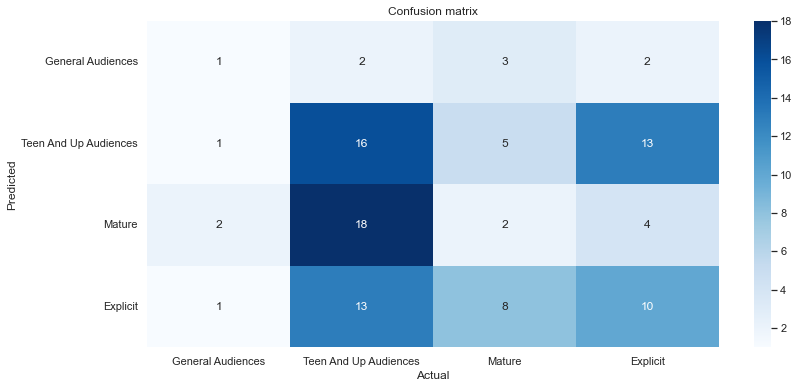

In [ ]:
aux_df = df_clean2[['rating', 'Rating_Code']].drop_duplicates().sort_values('Rating_Code')
conf_matrix = confusion_matrix(labels_test, knnc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['rating'].values, 
            yticklabels=aux_df['rating'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

### looking at the scores here. THe desirable score, would be high score in the diagonal region which would mean high number of true positives. 
### the actual matches the predicted. 

### General audiences tp score is smallest. 
### Teen audiences is okay at predicting with 16 for true positive. And 1+5+13 = 19 FP. Sometimes mistaken for explicit...
### mature seems to be mistaken for teen audiences... FP of 18+2+4 = 24.
### explicit mistaken for teen audiences... FP of 8+13+1 = 22

### I'm starting to think people are bad at rating their own fics :0

In [ ]:
base_model = KNeighborsClassifier()
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

0.32673267326732675

In [ ]:
best_knnc.fit(features_train, labels_train)
accuracy_score(labels_test, best_knnc.predict(features_test))

0.2871287128712871

### wow that's way worse than the other model which was .39

We can see that the default model (with 5 Nearest Neighbors) performs better. However, in our Grid Search Cross Validation process we tried with that number of neighbors. The reason why we may be getting this result is because de Grid Search performs a Cross Validation scheme, while this last comparison uses all training data.

We'll create a dataset with a model summary to compare models:

In [ ]:
d = {
     'Model': 'KNN',
     'Training Set Accuracy': accuracy_score(labels_train, best_knnc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, knnc_pred)
}

df_models_knnc = pd.DataFrame(d, index=[0])

In [ ]:
df_models_knnc

,Model,Training Set Accuracy,Test Set Accuracy
0,KNN,0.443069,0.287129


### the training set accuracy is higher than the test set accuracy so their may be some overfitting. 

In [ ]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
print(features_train.shape)
print(features_test.shape)

(404, 300)
(101, 300)


In [ ]:
rf_0 = RandomForestClassifier(random_state = 8)

print('Parameters currently in use:\n')
pprint(rf_0.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 8,
 'verbose': 0,
 'warm_start': False}


In [ ]:
# n_estimators
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

# max_features
max_features = ['auto', 'sqrt']

# max_depth
max_depth = [int(x) for x in np.linspace(20, 100, num = 5)]
max_depth.append(None)

# min_samples_split
min_samples_split = [2, 5, 10]

# min_samples_leaf
min_samples_leaf = [1, 2, 4]

# bootstrap
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [20, 40, 60, 80, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}


Then, we'll perform the Random Search:

In [ ]:
## Try again with a bigger dataset and save the models?
# First create the base model to tune
rfc = RandomForestClassifier(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=8),
                   n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [20, 40, 60, 80, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=8, scoring='accuracy', verbose=1)

In [ ]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': True}

The mean accuracy of a model with these hyperparameters is:
0.37381610466187576


In [ ]:
# Create the parameter grid based on the results of random search 
bootstrap = [False]
max_depth = [30, 40, 50]
max_features = ['sqrt']
min_samples_leaf = [1, 2, 4]
min_samples_split = [5, 10, 15]
n_estimators = [800]

param_grid = {
    'bootstrap': bootstrap,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators
}

# Create a base model
rfc = RandomForestClassifier(random_state=8)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             estimator=RandomForestClassifier(random_state=8),
             param_grid={'bootstrap': [False], 'max_depth': [30, 40, 50],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [800]},
             scoring='accuracy', verbose=1)

In [ ]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 800}

The mean accuracy of a model with these hyperparameters is:
0.3781094527363184


In [ ]:
best_rfc = grid_search.best_estimator_

In [ ]:
best_rfc

RandomForestClassifier(bootstrap=False, max_depth=30, max_features='sqrt',
                       min_samples_split=10, n_estimators=800, random_state=8)

Model fit and performance
Now, we can fit the model to our training data:



In [ ]:
best_rfc.fit(features_train, labels_train)

RandomForestClassifier(bootstrap=False, max_depth=30, max_features='sqrt',
                       min_samples_split=10, n_estimators=800, random_state=8)

In [ ]:
rfc_pred = best_rfc.predict(features_test)

In [ ]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_rfc.predict(features_train)))

The training accuracy is: 
0.995049504950495


In [ ]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, rfc_pred))

The test accuracy is: 
0.26732673267326734


In [ ]:
# Classification report
print("Classification report")
print(classification_report(labels_test,rfc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.14      0.03      0.05        35
           2       0.27      0.88      0.41        26
           3       0.33      0.09      0.15        32

    accuracy                           0.27       101
   macro avg       0.19      0.25      0.15       101
weighted avg       0.22      0.27      0.17       101



In [ ]:
df_clean2

,title,rating,fandom,body,Content_Parsed,Rating_Code
0,Let's Talk About Dinosaurs,Mature,aekhephuue`nkhrabephuue`n | Bad Buddy: the Ser...,Notes:\n\n \n\nNyasasaurus Pirringtoni is beli...,note nyasasaurus pirringtoni believe walk ...,2
1,Resurrected,Explicit,Mass Effect Trilogy,I opened my eyes and stared at a white ceiling...,open eye star white ceiling blurry vision...,3
2,Silent Night ~ Christmas Eve with Severus Snap...,Mature,Harry Potter - J. K. Rowling,\n\n\nChristmas. Your favourite time of year....,christmas favourite time year snow alread...,2
3,Flower Day,General Audiences,"Zhou Shu Hui Zhan | Jujutsu Kaisen (Manga), Z...",It comes in a split second where their eyes me...,come split second eye meet greenest col...,0
4,Proximity,General Audiences,Pu nohiroakademia | Boku no Hero Academia | My...,He stopped suddenly as he passed the living ro...,stop suddenly pass live room thirdyear d...,0
...,...,...,...,...,...,...
500,Days in Violet,Mature,"Hawkeye (TV 2021), Marvel Cinematic Universe, ...",\n (See the end of the chapter for n...,(see end chapter notes) wind ...,2
501,I can treat you better,Teen And Up Audiences,"Sonic the Hedgehog - All Media Types, Sonic th...",Zonic walked down the hallway of one of the pr...,zonic walk hallway one prison cell block ...,1
502,"From Today On, I Start Anew",Explicit,Kyou Kara Maou!,Tragedy strikes\n\n\nI wake up to the sound of...,tragedy strike wake sound thunder leas...,3
503,Melodies at Midnight,Explicit,"Final Fantasy VII Remake (Video Game 2020), Fi...",Hello!\n\nThanks for stopping by to read this!...,hello thank stop read fic cloti fall...,3


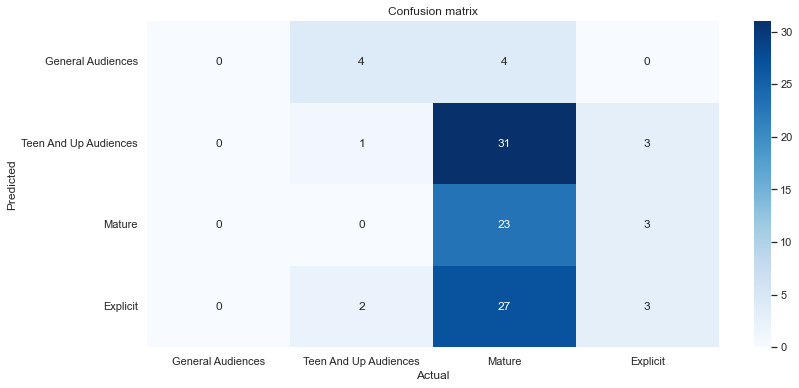

In [ ]:
aux_df = df_clean2[['rating', 'Rating_Code']].drop_duplicates().sort_values('Rating_Code')
conf_matrix = confusion_matrix(labels_test, rfc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['rating'].values, 
            yticklabels=aux_df['rating'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [ ]:
base_model = RandomForestClassifier(random_state = 8)
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

0.26732673267326734

In [ ]:
best_rfc.fit(features_train, labels_train)
accuracy_score(labels_test, best_rfc.predict(features_test))

0.26732673267326734

In [ ]:
d = {
     'Model': 'Random Forest',
     'Training Set Accuracy': accuracy_score(labels_train, best_rfc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, rfc_pred)
}

df_models_rfc = pd.DataFrame(d, index=[0])

In [ ]:
df_models_rfc

,Model,Training Set Accuracy,Test Set Accuracy
0,Random Forest,0.99505,0.267327


In [ ]:
##yep overfitting

In [ ]:
##I'm not gonna save this....

### I'm going to try classifying with the tags using this dataset


In [10]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

In [11]:
# let's read in our flower data...
# 
# for read_csv, use header=0 when row 0 is a header row
# 
filename = 'rating.csv'
df = pd.read_csv(filename)        # encoding="utf-8" et al.
print(f"{filename} : file read into a pandas dataframe.")

rating.csv : file read into a pandas dataframe.


In [12]:
df_tag = df
df_tag['Content_Parsed_1'] = df_tag['additional tags'].str.replace('"', '')

In [13]:
# Lowercasing the text
df_tag['Content_Parsed_2'] = df_tag['Content_Parsed_1'].str.lower()

In [14]:
punctuation_signs = list("?:!.,;")
df_tag['Content_Parsed_3'] = df_tag['Content_Parsed_2']

for punct_sign in punctuation_signs:
    df_tag['Content_Parsed_3'] = df_tag['Content_Parsed_3'].str.replace(punct_sign, '')

In [15]:
df_tag['Content_Parsed_4'] = df_tag['Content_Parsed_3'].str.replace("'s", "")

In [16]:
import pickle
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
import numpy as np

In [25]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [23]:
# Downloading punkt and wordnet from NLTK
nltk.download('punkt')
print("------------------------------------------------------------")
nltk.download('wordnet')

------------------------------------------------------------


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/waverlywang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/waverlywang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
#### can't get lemmatizer to work
wordnet_lemmatizer = WordNetLemmatizer()

In [26]:
nrows = len(df)
lemmatized_text_list = []

for row in range(0, nrows):

    # Create an empty list containing lemmatized words
    lemmatized_list = []

    # Save the text and its words into an object
    text = df_tag.loc[row]['Content_Parsed_4']
    text_words = text.split(" ")

    # Iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))

    # Join the list
    lemmatized_text = " ".join(lemmatized_list)

    # Append to the list containing the texts
    lemmatized_text_list.append(lemmatized_text)

In [27]:
df_clean2['Content_Parsed_5'] = lemmatized_text_list

In [28]:
stop_words = list(stopwords.words('english'))

In [29]:
df_tag['Content_Parsed_5'] = df_tag['Content_Parsed_4']

for stop_word in stop_words:

    regex_stopword = r"\b" + stop_word + r"\b"
    df_tag['Content_Parsed_5'] = df_tag['Content_Parsed_5'].str.replace(regex_stopword, '')

In [30]:
df_tag.loc[5]['additional tags']

'Crossovers & Fandom Fusions, Crossover Pairings, Action & Romance, Midoriya Izuku-centric, Midoriya Izuku Has a Harem, Magic-User Midoriya Izuku, Overpowered Midoriya Izuku, Confident Midoriya Izuku, BAMF Midoriya Izuku, Eventual Smut, Cross-Posted on Wattpad, Alternate Universe - Canon Divergence'

In [31]:
df_tag.loc[5]['Content_Parsed_2']

'crossovers & fandom fusions, crossover pairings, action & romance, midoriya izuku-centric, midoriya izuku has a harem, magic-user midoriya izuku, overpowered midoriya izuku, confident midoriya izuku, bamf midoriya izuku, eventual smut, cross-posted on wattpad, alternate universe - canon divergence'

In [32]:
df_tag.loc[5]['Content_Parsed_3']

'crossovers & fandom fusions crossover pairings action & romance midoriya izuku-centric midoriya izuku has a harem magic-user midoriya izuku overpowered midoriya izuku confident midoriya izuku bamf midoriya izuku eventual smut cross-posted on wattpad alternate universe - canon divergence'

In [33]:
df_tag.loc[5]['Content_Parsed_4']

'crossovers & fandom fusions crossover pairings action & romance midoriya izuku-centric midoriya izuku has a harem magic-user midoriya izuku overpowered midoriya izuku confident midoriya izuku bamf midoriya izuku eventual smut cross-posted on wattpad alternate universe - canon divergence'

In [34]:
df_tag.loc[5]['Content_Parsed_5']

'crossovers & fandom fusions crossover pairings action & romance midoriya izuku-centric midoriya izuku   harem magic-user midoriya izuku overpowered midoriya izuku confident midoriya izuku bamf midoriya izuku eventual smut cross-posted  wattpad alternate universe - canon divergence'

In [35]:

df_tag['Content_Parsed_6'] = df_tag['Content_Parsed_5'].str.replace("'", "")
##fanfiction authors use these 
df_tag['Content_Parsed_6'] = df_tag['Content_Parsed_5'].str.replace("=", "")
df_tag['Content_Parsed_6'] = df_tag['Content_Parsed_5'].str.replace("-", "")
df_tag['Content_Parsed_6'] = df_tag['Content_Parsed_5'].str.replace("~", "")

In [36]:
df_tag.loc[5]['Content_Parsed_6']

'crossovers & fandom fusions crossover pairings action & romance midoriya izuku-centric midoriya izuku   harem magic-user midoriya izuku overpowered midoriya izuku confident midoriya izuku bamf midoriya izuku eventual smut cross-posted  wattpad alternate universe - canon divergence'

In [37]:
list_columns = ["title", "rating", "additional tags", "fandom", "Content_Parsed_6"]
df_tag= df_tag[list_columns]

df_tag=df_tag.rename(columns={'Content_Parsed_6': 'Content_Parsed'})

In [38]:
df_tag

,title,rating,additional tags,fandom,Content_Parsed
0,Let's Talk About Dinosaurs,Mature,"doctor and archaeologists, Romance, I'm Bad At...",aekhephuue`nkhrabephuue`n | Bad Buddy: the Ser...,doctor archaeologists romance ' bad tagging ...
1,Resurrected,Explicit,"Infiltrator (Mass Effect), Normandy-SR2, Mass ...",Mass Effect Trilogy,infiltrator (mass effect) normandy-sr2 mass ef...
2,Silent Night ~ Christmas Eve with Severus Snap...,Mature,"Christmas, Christmas Fluff, Holidays, One Shot...",Harry Potter - J. K. Rowling,christmas christmas fluff holidays one shot ra...
3,Flower Day,General Audiences,"Alternate Universe, Reincarnation, Soulmates, ...","Zhou Shu Hui Zhan | Jujutsu Kaisen (Manga), Z...",alternate universe reincarnation soulmates hig...
4,Proximity,General Audiences,"Tamajire, Tamaneji, Nejitama - Freeform, Slow ...",Pu nohiroakademia | Boku no Hero Academia | My...,tamajire tamaneji nejitama - freeform slow rom...
...,...,...,...,...,...
500,Days in Violet,Mature,"victorian au, Lesbian Yelena Belova, Kate is f...","Hawkeye (TV 2021), Marvel Cinematic Universe, ...",victorian au lesbian yelena belova kate fille...
501,I can treat you better,Teen And Up Audiences,"Tooth-Rotting Fluff, Romantic Fluff, Hurt/Comf...","Sonic the Hedgehog - All Media Types, Sonic th...",tooth-rotting fluff romantic fluff hurt/comfor...
502,"From Today On, I Start Anew",Explicit,"Alternate Universe - Time Travel, Alternate Ca...",Kyou Kara Maou!,alternate universe - time travel alternate can...
503,Melodies at Midnight,Explicit,"Angst, Heavy Angst, Past Zerith, canon complia...","Final Fantasy VII Remake (Video Game 2020), Fi...",angst heavy angst past zerith canon compliant ...


In [39]:
rating_codes = {
    'General Audiences': 0,
    'Teen And Up Audiences': 1,
    'Mature': 2,
    'Explicit': 3,
}

In [40]:
# Category mapping
df_tag['Rating_Code'] = df_tag['rating']
df_tag = df_tag.replace({'Rating_Code':rating_codes})
df_tag

,title,rating,additional tags,fandom,Content_Parsed,Rating_Code
0,Let's Talk About Dinosaurs,Mature,"doctor and archaeologists, Romance, I'm Bad At...",aekhephuue`nkhrabephuue`n | Bad Buddy: the Ser...,doctor archaeologists romance ' bad tagging ...,2
1,Resurrected,Explicit,"Infiltrator (Mass Effect), Normandy-SR2, Mass ...",Mass Effect Trilogy,infiltrator (mass effect) normandy-sr2 mass ef...,3
2,Silent Night ~ Christmas Eve with Severus Snap...,Mature,"Christmas, Christmas Fluff, Holidays, One Shot...",Harry Potter - J. K. Rowling,christmas christmas fluff holidays one shot ra...,2
3,Flower Day,General Audiences,"Alternate Universe, Reincarnation, Soulmates, ...","Zhou Shu Hui Zhan | Jujutsu Kaisen (Manga), Z...",alternate universe reincarnation soulmates hig...,0
4,Proximity,General Audiences,"Tamajire, Tamaneji, Nejitama - Freeform, Slow ...",Pu nohiroakademia | Boku no Hero Academia | My...,tamajire tamaneji nejitama - freeform slow rom...,0
...,...,...,...,...,...,...
500,Days in Violet,Mature,"victorian au, Lesbian Yelena Belova, Kate is f...","Hawkeye (TV 2021), Marvel Cinematic Universe, ...",victorian au lesbian yelena belova kate fille...,2
501,I can treat you better,Teen And Up Audiences,"Tooth-Rotting Fluff, Romantic Fluff, Hurt/Comf...","Sonic the Hedgehog - All Media Types, Sonic th...",tooth-rotting fluff romantic fluff hurt/comfor...,1
502,"From Today On, I Start Anew",Explicit,"Alternate Universe - Time Travel, Alternate Ca...",Kyou Kara Maou!,alternate universe - time travel alternate can...,3
503,Melodies at Midnight,Explicit,"Angst, Heavy Angst, Past Zerith, canon complia...","Final Fantasy VII Remake (Video Game 2020), Fi...",angst heavy angst past zerith canon compliant ...,3


In [41]:
X_train, X_test, y_train, y_test = train_test_split(df_tag['Content_Parsed'], 
                                                    df_tag['Rating_Code'], 
                                                    test_size=0.2, 
                                                    random_state=8)

In [42]:
# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [43]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(404, 300)
(101, 300)


In [44]:
from sklearn.feature_selection import chi2
import numpy as np

for Product, category_id in sorted(rating_codes.items()):
    features_chi2 = chi2(features_train, labels_train == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}' category:".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-7:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")

# 'Explicit' category:
  . Most correlated unigrams:
. vaginal
. masturbation
. jobs
. anal
. oral
. porn
. sex
  . Most correlated bigrams:
. anal sex
. oral sex

# 'General Audiences' category:
  . Most correlated unigrams:
. rotting
. family
. soulmates
. sex
. romance
. fluff
. childhood
  . Most correlated bigrams:
. romance fluff
. fluff humor

# 'Mature' category:
  . Most correlated unigrams:
. ptsd
. childhood
. tension
. masturbation
. burn
. story
. porn
  . Most correlated bigrams:
. post traumatic
. sexual tension

# 'Teen And Up Audiences' category:
  . Most correlated unigrams:
. go
. sexual
. sad
. teen
. relationships
. smut
. sex
  . Most correlated bigrams:
. eventual smut
. teen romance



In [ ]:
bigrams

['alternate universe',
 'fluff romantic',
 'high school',
 'established relationship',
 'canonical character',
 'romance drama',
 'college university',
 'eventual happy',
 'fluff humor',
 'true love',
 'canon compliant',
 'harry potter',
 'implied referenced',
 'beta read',
 'fluff romance',
 'universe college',
 'canon divergence',
 'comfort angst',
 'angst hurt',
 'mutual pining',
 'universe canon',
 'beta die',
 'alcohol abuse',
 'angst angst',
 'fluff eventual',
 'romantic fluff',
 'universe modern',
 'child abuse',
 'enemies friends',
 'blood injury',
 'modern setting',
 'action adventure',
 'romance fluff',
 'romance angst',
 'time travel',
 'romance slow',
 'romantic comedy',
 'die like',
 'adventure romance',
 'love confessions',
 'angst fluff',
 'reader insert',
 'angst feels',
 'romance eventual',
 'domestic fluff',
 'action romance',
 'blow jobs',
 'light angst',
 'drama romance',
 'eventual romance',
 'original character',
 'idiots love',
 'fluff angst',
 'sex vaginal',
 'n

### this looks promising!!


Knn model

In [ ]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
knnc_0 =KNeighborsClassifier()

print('Parameters currently in use:\n')
pprint(knnc_0.get_params())

Parameters currently in use:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


In [ ]:
# Create the parameter grid 
n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 500, num = 100)]

param_grid = {'n_neighbors': n_neighbors}

# Create a base model
knnc = KNeighborsClassifier()

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=knnc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_scorer.py", line 53, in _cached_call
    return getattr(estimator, met

GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46,
                                         51, 56, 61, 66, 71, 76, 81, 86, 91, 96,
                                         101, 106, 111, 116, 121, 127, 132, 137,
                                         142, 147, ...]},
             scoring='accuracy', verbose=1)

In [ ]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'n_neighbors': 21}

The mean accuracy of a model with these hyperparameters is:
0.4651741293532338


In [ ]:
n_neighbors = [1,2,3,4,5,6,7,8,9,10,11]
param_grid = {'n_neighbors': n_neighbors}

knnc = KNeighborsClassifier()
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

grid_search = GridSearchCV(estimator=knnc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 11 candidates, totalling 33 fits


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]},
             scoring='accuracy', verbose=1)

In [ ]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'n_neighbors': 8}

The mean accuracy of a model with these hyperparameters is:
0.445273631840796


### This is better than the first tries!!
## THe mean accuracy was .35 last time with the 300 dataset. 
### The mean accuracy for 500 dataset was .33
### now it improved to .44 with tags!

In [ ]:
best_knnc = grid_search.best_estimator_

In [ ]:
best_knnc

KNeighborsClassifier(n_neighbors=8)

In [ ]:
best_knnc.fit(features_train, labels_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
knnc_pred = best_knnc.predict(features_test)

The conditional class probabilities can be obtained by typing:

knnc_pred = best_knnc.predict_proba(features_test)

For performance analysis, we will use the confusion matrix, the classification report and the accuracy on both training and test data:

Training accuracy

In [ ]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, knnc_pred))

The test accuracy is: 
0.4752475247524752


In [ ]:
### So first try was .43 for the 300 fic dataset. 
### then it became .44 and then now it's .47 .
##little improvement

In [ ]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, knnc_pred))

The test accuracy is: 
0.4752475247524752


In [ ]:
# Classification report
print("Classification report")
print(classification_report(labels_test,knnc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.25      0.12      0.17         8
           1       0.57      0.57      0.57        35
           2       0.36      0.62      0.45        26
           3       0.65      0.34      0.45        32

    accuracy                           0.48       101
   macro avg       0.46      0.41      0.41       101
weighted avg       0.51      0.48      0.47       101



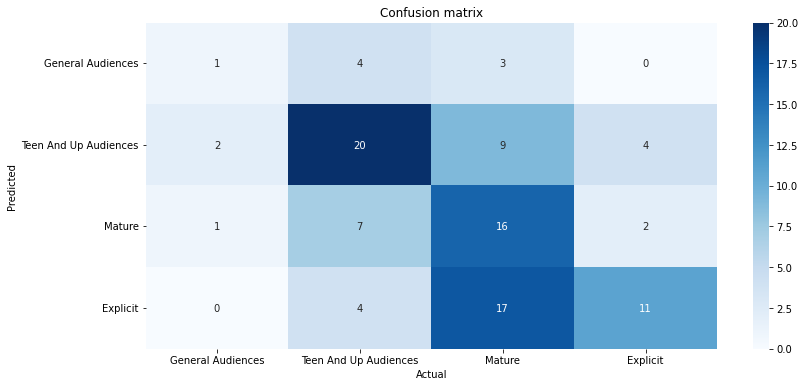

In [ ]:
aux_df = df_tag[['rating', 'Rating_Code']].drop_duplicates().sort_values('Rating_Code')
conf_matrix = confusion_matrix(labels_test, knnc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['rating'].values, 
            yticklabels=aux_df['rating'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

### okay so this is improvement here!. 
### things are not being confused for teen audiences as much! and it makes sense to me that mature and explicit would be mixed up :)


In [ ]:
base_model = KNeighborsClassifier()
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

0.4158415841584158

In [ ]:
best_knnc.fit(features_train, labels_train)
accuracy_score(labels_test, best_knnc.predict(features_test))

0.4752475247524752

In [ ]:
d = {
     'Model': 'KNN',
     'Training Set Accuracy': accuracy_score(labels_train, best_knnc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, knnc_pred)
}

df_models_knnc = pd.DataFrame(d, index=[0])

In [ ]:
df_models_knnc

,Model,Training Set Accuracy,Test Set Accuracy
0,KNN,0.596535,0.475248


### So that's a little bit better. Like the first try was .39 for test set accuracuary for 300 fic with 4 fandoms. Then it was .28 using 500 fics with multifandoms.

## but using tags as the features seem to have improved it to .47!

### I'm not gonna try random forest because it doesn't really do well

### I do want to try doing this on the 300 fic (4 fandom dataset and see how it does)

In [ ]:
# let's read in our flower data...
# 
# for read_csv, use header=0 when row 0 is a header row
# 
filename = 'fanficbodies.csv'
df = pd.read_csv(filename)        # encoding="utf-8" et al.
print(f"{filename} : file read into a pandas dataframe.")

fanficbodies.csv : file read into a pandas dataframe.


In [ ]:
df

,work_id,title,author,rating,category,fandom,relationship,character,additional tags,language,...,status date,words,chapters,comments,kudos,bookmarks,hits,all_kudos,all_bookmarks,body
0,38068225,A Hundred Theories,['genuineformality'],General Audiences,Gen,Six of Crows Series - Leigh Bardugo,Kaz Brekker/Inej Ghafa,"Kaz Brekker, Inej Ghafa","Pre-Canon, Developing Friendships, Kaz Brekker...",English,...,2022-03-31,2091,1/1,32.0,82.0,4.0,387,"['majeda', 'crackbaby13', 'Starryskyondragonsb...",[],"\n\nKaz hated a puzzle he couldn't solve, and ..."
1,38010298,i'll tell you all about it (when i see you again),['people_watching'],Not Rated,NaN,Six of Crows Series - Leigh Bardugo,"Matthias Helvar/Nina Zenik, Kaz Brekker/Inej G...","Matthias Helvar, Wylan Van Eck, Inej Ghafa, Ni...","Post-Book 2: Crooked Kingdom, Spoilers for Cro...",English,...,2022-03-31,2656,3/6,4.0,17.0,1.0,258,"['carry_on_simon', 'Elevatornotworthy_1', 'Oli...",[],Matthias can barely hear himself think with th...
2,35211865,Where Do Broken Hearts Go?,['RupturedHaven'],General Audiences,"F/M, M/M, Multi","The Grisha Trilogy - Leigh Bardugo, Shadow and...","Kaz Brekker/Inej Ghafa, Jesper Fahey/Wylan Van...","Kaz Brekker, Inej Ghafa, Jesper Fahey, Wylan V...","Kanej - Freeform, Six of Crows, Grishaverse, s...",English,...,2022-03-30,38366,17/?,70.0,328.0,33.0,7125,"['Lucixeve', 'sjonsson97', 'crowandcup', 'Guew...",[],\n~\n1\n~\n\n\n\nINEJ\n\n\nInej held the door ...
3,38027824,Kanej oneshots to fill the hole in my heart,['itsraingcatsanddogs'],Teen And Up Audiences,Multi,"Six of Crows Series - Leigh Bardugo, The Grish...","Kaz Brekker/Inej Ghafa, Kaz Brekker & Inej Ghafa","Kaz Brekker, Inej Ghafa, Original Kaz Brekker/...","Kanej - Freeform, Post-Book 2: Crooked Kingdom...",English,...,2022-03-30,1915,2/?,NaN,4.0,NaN,294,['IReadBooksForFun'],[],It was a busy day in the Barrel. It was always...
4,38066179,save me from myself (don't let me down),['xxartistintrainingxx'],Teen And Up Audiences,M/M,Six of Crows Series - Leigh Bardugo,Jesper Fahey/Wylan Van Eck,"Wylan Van Eck, Jesper Fahey","Nightmares, Hurt/Comfort, Angst, Wylan Van Eck...",English,...,2022-03-30,2174,1/1,4.0,36.0,4.0,397,"['ThatOddNerd', 'bee_slut', 'Reader2005', 'Boo...",[],Wylan gasped and thrashed as he struggled to s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,38106892,All Mine (and His),['maraudersaffair'],Explicit,F/M,Harry Potter - J. K. Rowling,"Hermione Granger/Draco Malfoy, Hermione Grange...","Hermione Granger, Draco Malfoy, Charlie Weasley","Threesome - F/M/M, Polyamory, Getting Together...",English,...,2022-04-01,5019,1/1,2.0,73.0,9.0,1916,"['Cookiemom14', 'JamesLethe', 'Trichardson', '...",[],Hermione wanted a baby. She wanted to be a mot...
382,38106853,La bibliotheque aux mille livres,['NekoKirei'],Teen And Up Audiences,Other,Harry Potter - J. K. Rowling,NaN,"Ginny Weasley, Theodore Nott",Tom Riddle's Diary,Francais,...,2022-04-01,422,1/1,NaN,2.0,NaN,4,[],[],"Elle avait juste besoin de s'asseoir, loin de ..."
383,37316926,Jack's Snowflake,['TheologyDiscography'],General Audiences,Gen,"Harry Potter - J. K. Rowling, Rise of the Guar...",Jack Frost (Guardians of Childhood)/Harry Potter,"Harry Potter, Jack Frost (Guardians of Childhood)","Pre-Canon, Canonical Child Abuse, Fluff, Hurt/...",English,...,2022-04-01,1906,6/?,8.0,99.0,29.0,916,"['jaskier09', 'ItsBiancaNeve', 'CatNip_618', '...",[],Jack dropped to the ground next to the li...
384,31236521,In the Shadows (Wizarding War),['CL_Avery'],Mature,"F/M, Multi",Harry Potter - J. K. Rowling,"Sirius Black/Original Female Character(s), Jam...","Original Characters, Sirius Black, James Potte...","Wizarding Wars (Harry Potter), Order of the Ph...",English,...,2022-04-01,134525,24/?,36.0,50.0,15.0,1941,"['LaInternettuale', 'Darie1_6', 'Lady_Murphyy'...",[],\n\n\n\n\n\nClaudia opened her eyes and glance...


In [ ]:
## rows with multiple fandoms eliminate? 
sc = 0
mc = 0
list_drop = []
for i in range(len(df)):
    fandom_list = df['fandom'][i]
    fandom_list = fandom_list.split(",")
#     print(fandom_list)
    if len(fandom_list) == 1:
        if fandom_list[0] == 'Six of Crows Series - Leigh Bardugo':
            sc+=1
        elif fandom_list[0] == 'Sherlock (TV)' :
            sc+=1
        elif fandom_list[0] == 'James Bond (Craig Movies)' :
            sc+=1
        elif fandom_list[0] == 'Harry Potter - J. K. Rowling':
            sc+=1
        else:
            list_drop += [i]
    else:
        #drop the ones that are multifandom 
        list_drop += [i]
        mc+=1
print(list_drop)

print(f'{sc} that are only one fandom')
print(f'{mc} that are multifandom')    
    

[2, 3, 6, 7, 9, 10, 12, 13, 14, 16, 19, 22, 23, 24, 25, 26, 27, 28, 31, 32, 40, 44, 45, 46, 49, 50, 51, 53, 56, 57, 60, 61, 62, 63, 68, 73, 75, 76, 77, 86, 89, 90, 91, 92, 95, 96, 98, 99, 100, 104, 107, 109, 116, 118, 122, 124, 126, 127, 129, 132, 135, 137, 138, 140, 142, 143, 144, 148, 149, 150, 155, 157, 161, 167, 168, 170, 172, 173, 174, 181, 182, 183, 184, 194, 195, 201, 202, 212, 213, 217, 218, 219, 220, 224, 225, 226, 227, 228, 231, 233, 234, 235, 239, 240, 242, 250, 251, 254, 256, 265, 268, 270, 271, 273, 277, 279, 280, 281, 282, 283, 289, 291, 294, 300, 304, 311, 318, 323, 332, 334, 335, 338, 349, 352, 354, 356, 363, 370, 377, 383]
246 that are only one fandom
138 that are multifandom


In [ ]:
##put only english stuff in the thing
list1 = []
for i in range(0, len(df)):
    if df['language'][i] != "English":
        if i not in list_drop:
            list1+=[i]
print(list1)
for value in list1:
    list_drop += [value]
    
print(list_drop)

[198, 205, 210, 215, 221, 229, 237, 238, 241, 243, 244, 245, 246, 247, 248, 253, 257, 262, 266, 274, 284, 351, 368, 374, 378, 382]
[2, 3, 6, 7, 9, 10, 12, 13, 14, 16, 19, 22, 23, 24, 25, 26, 27, 28, 31, 32, 40, 44, 45, 46, 49, 50, 51, 53, 56, 57, 60, 61, 62, 63, 68, 73, 75, 76, 77, 86, 89, 90, 91, 92, 95, 96, 98, 99, 100, 104, 107, 109, 116, 118, 122, 124, 126, 127, 129, 132, 135, 137, 138, 140, 142, 143, 144, 148, 149, 150, 155, 157, 161, 167, 168, 170, 172, 173, 174, 181, 182, 183, 184, 194, 195, 201, 202, 212, 213, 217, 218, 219, 220, 224, 225, 226, 227, 228, 231, 233, 234, 235, 239, 240, 242, 250, 251, 254, 256, 265, 268, 270, 271, 273, 277, 279, 280, 281, 282, 283, 289, 291, 294, 300, 304, 311, 318, 323, 332, 334, 335, 338, 349, 352, 354, 356, 363, 370, 377, 383, 198, 205, 210, 215, 221, 229, 237, 238, 241, 243, 244, 245, 246, 247, 248, 253, 257, 262, 266, 274, 284, 351, 368, 374, 378, 382]


In [ ]:
ROW = 0
COLUMN = 1
df_clean1 = df.drop(list_drop, axis=ROW)
df_clean1

,work_id,title,author,rating,category,fandom,relationship,character,additional tags,language,...,status date,words,chapters,comments,kudos,bookmarks,hits,all_kudos,all_bookmarks,body
0,38068225,A Hundred Theories,['genuineformality'],General Audiences,Gen,Six of Crows Series - Leigh Bardugo,Kaz Brekker/Inej Ghafa,"Kaz Brekker, Inej Ghafa","Pre-Canon, Developing Friendships, Kaz Brekker...",English,...,2022-03-31,2091,1/1,32.0,82.0,4.0,387,"['majeda', 'crackbaby13', 'Starryskyondragonsb...",[],"\n\nKaz hated a puzzle he couldn't solve, and ..."
1,38010298,i'll tell you all about it (when i see you again),['people_watching'],Not Rated,NaN,Six of Crows Series - Leigh Bardugo,"Matthias Helvar/Nina Zenik, Kaz Brekker/Inej G...","Matthias Helvar, Wylan Van Eck, Inej Ghafa, Ni...","Post-Book 2: Crooked Kingdom, Spoilers for Cro...",English,...,2022-03-31,2656,3/6,4.0,17.0,1.0,258,"['carry_on_simon', 'Elevatornotworthy_1', 'Oli...",[],Matthias can barely hear himself think with th...
4,38066179,save me from myself (don't let me down),['xxartistintrainingxx'],Teen And Up Audiences,M/M,Six of Crows Series - Leigh Bardugo,Jesper Fahey/Wylan Van Eck,"Wylan Van Eck, Jesper Fahey","Nightmares, Hurt/Comfort, Angst, Wylan Van Eck...",English,...,2022-03-30,2174,1/1,4.0,36.0,4.0,397,"['ThatOddNerd', 'bee_slut', 'Reader2005', 'Boo...",[],Wylan gasped and thrashed as he struggled to s...
5,37607470,"You fell from the tree again, didn't you?",['AlphaZeroAce'],Teen And Up Audiences,NaN,Six of Crows Series - Leigh Bardugo,"Kaz Brekker & Jesper Fahey, Kaz Brekker & Jord...","Kaz Brekker, Jordie Rietveld, Jesper Fahey","Past, Kaz Brekker & Jesper Fahey Friendship, Y...",English,...,2022-03-30,2989,4/?,NaN,18.0,2.0,477,"['Adore_reading', 'bookworm_krisi1', 'StarRose...",[],\n\nKaz was sitting under the tree in the back...
8,37590898,You knew them,['AlphaZeroAce'],General Audiences,NaN,Six of Crows Series - Leigh Bardugo,"Kaz Brekker & Jesper Fahey, Kaz Brekker & Jord...","Kaz Brekker, Kaz Brekker's Father, Kaz Brekker...","Character Death, Jordie Rietveld Lives, Big Br...",English,...,2022-03-30,5391,5/?,3.0,63.0,6.0,1029,"['FangirlFreak08', 'Catduck', 'dontloseyourhea...",[],\n\nWhy did I come here. Kaz thought as Colm w...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,38106952,The doe and the stag,['marlo_zart'],Teen And Up Audiences,F/M,Harry Potter - J. K. Rowling,James Potter/Lily Evans Potter,"James Potter, Lily Evans Potter, Minerva McGon...","Hurt/Comfort, Fluff, Marriage Proposal",English,...,2022-04-01,1600,1/?,NaN,3.0,NaN,49,[],[],James finds Lily after a distressing letter fr...
380,38096989,Payback is a real bitch,['x_manga_Bleach_x'],Explicit,M/M,Harry Potter - J. K. Rowling,"Draco Malfoy/Lucius Malfoy, Harry Potter & Fre...","Harry Potter, Fred Weasley, George Weasley, Lu...","Revenge, Public Humiliation, Insane Harry Pott...",English,...,2022-04-01,2335,1/1,1.0,36.0,7.0,512,"['Junebug_27', 'FuzzPuzzBuzz', 'shiggyonthebea...",[],Harry huffed when he saw the headlines of the ...
381,38106892,All Mine (and His),['maraudersaffair'],Explicit,F/M,Harry Potter - J. K. Rowling,"Hermione Granger/Draco Malfoy, Hermione Grange...","Hermione Granger, Draco Malfoy, Charlie Weasley","Threesome - F/M/M, Polyamory, Getting Together...",English,...,2022-04-01,5019,1/1,2.0,73.0,9.0,1916,"['Cookiemom14', 'JamesLethe', 'Trichardson', '...",[],Hermione wanted a baby. She wanted to be a mot...
384,31236521,In the Shadows (Wizarding War),['CL_Avery'],Mature,"F/M, Multi",Harry Potter - J. K. Rowling,"Sirius Black/Original Female Character(s), Jam...","Original Characters, Sirius Black, James Potte...","Wizarding Wars (Harry Potter), Order of the Ph...",English,...,2022-04-01,134525,24/?,36.0,50.0,15.0,1941,"['LaInternettuale', 'Darie1_6', 'Lady_Murphyy'...",[],\n\n\n\n\n\nClaudia opened her eyes and glance...


In [ ]:

import pickle
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
import numpy as np

In [ ]:
df_tag1 = df_clean1
df_tag1['Content_Parsed_1'] = df_tag1['additional tags'].str.replace('"', '')

In [ ]:
# Lowercasing the text
df_tag1['Content_Parsed_2'] = df_tag1['Content_Parsed_1'].str.lower()

In [ ]:
punctuation_signs = list("?:!.,;")
df_tag1['Content_Parsed_3'] = df_tag1['Content_Parsed_2']

for punct_sign in punctuation_signs:
    df_tag1['Content_Parsed_3'] = df_tag1['Content_Parsed_3'].str.replace(punct_sign, '')

In [ ]:
df_tag1['Content_Parsed_4'] = df_tag1['Content_Parsed_3'].str.replace("'s", "")

In [ ]:
import pickle
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
import numpy as np

In [ ]:
stop_words = list(stopwords.words('english'))

In [ ]:
df_tag1['Content_Parsed_5'] = df_tag1['Content_Parsed_4']

for stop_word in stop_words:

    regex_stopword = r"\b" + stop_word + r"\b"
    df_tag1['Content_Parsed_5'] = df_tag1['Content_Parsed_5'].str.replace(regex_stopword, '')

In [ ]:
df_tag.loc[5]['additional tags']

'Crossovers & Fandom Fusions, Crossover Pairings, Action & Romance, Midoriya Izuku-centric, Midoriya Izuku Has a Harem, Magic-User Midoriya Izuku, Overpowered Midoriya Izuku, Confident Midoriya Izuku, BAMF Midoriya Izuku, Eventual Smut, Cross-Posted on Wattpad, Alternate Universe - Canon Divergence'

In [ ]:

df_tag1['Content_Parsed_6'] = df_tag1['Content_Parsed_5'].str.replace("'", "")
##fanfiction authors use these 
df_tag1['Content_Parsed_6'] = df_tag1['Content_Parsed_5'].str.replace("=", "")
df_tag1['Content_Parsed_6'] = df_tag1['Content_Parsed_5'].str.replace("-", "")
df_tag1['Content_Parsed_6'] = df_tag1['Content_Parsed_5'].str.replace("~", "")

In [ ]:
df_tag1.loc[5]['Content_Parsed_6']

'past kaz brekker & jesper fahey friendship young kaz  jordie young jesper fall  boy lyrics kaz brekker needs  hug jordie reitveld pov pov kaz brekker pov jesper fahey hunting laughing   bad times original creture hurt kaz brekker bad dreams nightmares night terrors kaz brekker  ptsd jordie rietveld  ptsd jesper  kaz forgoten past flashbacks major character injury character death death near death experiences child death'

In [ ]:
list_columns = ["title", "rating", "additional tags", "fandom", "Content_Parsed_6"]
df_tag1= df_tag1[list_columns]

df_tag1=df_tag1.rename(columns={'Content_Parsed_6': 'Content_Parsed'})

In [ ]:
df_tag1

,title,rating,additional tags,fandom,Content_Parsed
0,A Hundred Theories,General Audiences,"Pre-Canon, Developing Friendships, Kaz Brekker...",Six of Crows Series - Leigh Bardugo,pre-canon developing friendships kaz brekker ...
1,i'll tell you all about it (when i see you again),Not Rated,"Post-Book 2: Crooked Kingdom, Spoilers for Cro...",Six of Crows Series - Leigh Bardugo,post-book 2 crooked kingdom spoilers crooked ...
4,save me from myself (don't let me down),Teen And Up Audiences,"Nightmares, Hurt/Comfort, Angst, Wylan Van Eck...",Six of Crows Series - Leigh Bardugo,nightmares hurt/comfort angst wylan van eck ne...
5,"You fell from the tree again, didn't you?",Teen And Up Audiences,"Past, Kaz Brekker & Jesper Fahey Friendship, Y...",Six of Crows Series - Leigh Bardugo,past kaz brekker & jesper fahey friendship you...
8,You knew them,General Audiences,"Character Death, Jordie Rietveld Lives, Big Br...",Six of Crows Series - Leigh Bardugo,character death jordie rietveld lives big brot...
...,...,...,...,...,...
379,The doe and the stag,Teen And Up Audiences,"Hurt/Comfort, Fluff, Marriage Proposal",Harry Potter - J. K. Rowling,hurt/comfort fluff marriage proposal
380,Payback is a real bitch,Explicit,"Revenge, Public Humiliation, Insane Harry Pott...",Harry Potter - J. K. Rowling,revenge public humiliation insane harry potter...
381,All Mine (and His),Explicit,"Threesome - F/M/M, Polyamory, Getting Together...",Harry Potter - J. K. Rowling,threesome - f// polyamory getting together bre...
384,In the Shadows (Wizarding War),Mature,"Wizarding Wars (Harry Potter), Order of the Ph...",Harry Potter - J. K. Rowling,wizarding wars (harry potter) order phoenix ...


In [ ]:
rating_codes = {
    'General Audiences': 0,
    'Teen And Up Audiences': 1,
    'Mature': 2,
    'Explicit': 3,
}

In [ ]:
# Category mapping
df_tag1['Rating_Code'] = df_tag1['rating']
df_tag1 = df_tag1.replace({'Rating_Code':rating_codes})
df_tag1

,title,rating,additional tags,fandom,Content_Parsed,Rating_Code
0,A Hundred Theories,General Audiences,"Pre-Canon, Developing Friendships, Kaz Brekker...",Six of Crows Series - Leigh Bardugo,pre-canon developing friendships kaz brekker ...,0
1,i'll tell you all about it (when i see you again),Not Rated,"Post-Book 2: Crooked Kingdom, Spoilers for Cro...",Six of Crows Series - Leigh Bardugo,post-book 2 crooked kingdom spoilers crooked ...,Not Rated
4,save me from myself (don't let me down),Teen And Up Audiences,"Nightmares, Hurt/Comfort, Angst, Wylan Van Eck...",Six of Crows Series - Leigh Bardugo,nightmares hurt/comfort angst wylan van eck ne...,1
5,"You fell from the tree again, didn't you?",Teen And Up Audiences,"Past, Kaz Brekker & Jesper Fahey Friendship, Y...",Six of Crows Series - Leigh Bardugo,past kaz brekker & jesper fahey friendship you...,1
8,You knew them,General Audiences,"Character Death, Jordie Rietveld Lives, Big Br...",Six of Crows Series - Leigh Bardugo,character death jordie rietveld lives big brot...,0
...,...,...,...,...,...,...
379,The doe and the stag,Teen And Up Audiences,"Hurt/Comfort, Fluff, Marriage Proposal",Harry Potter - J. K. Rowling,hurt/comfort fluff marriage proposal,1
380,Payback is a real bitch,Explicit,"Revenge, Public Humiliation, Insane Harry Pott...",Harry Potter - J. K. Rowling,revenge public humiliation insane harry potter...,3
381,All Mine (and His),Explicit,"Threesome - F/M/M, Polyamory, Getting Together...",Harry Potter - J. K. Rowling,threesome - f// polyamory getting together bre...,3
384,In the Shadows (Wizarding War),Mature,"Wizarding Wars (Harry Potter), Order of the Ph...",Harry Potter - J. K. Rowling,wizarding wars (harry potter) order phoenix ...,2


In [ ]:
## FORGOT TO REMOVE THE NOT RATED STUFF
list2 = []
for i in range(0, len(df_tag1)):
    if i not in list_drop:
        if df_tag1['Rating_Code'][i] == "Not Rated":
            list2+=[i]

print(list2)

[1, 15, 30, 35, 39, 41, 43, 48, 70, 72, 78, 196, 204, 211]


In [ ]:
df_tag2 = df_tag1.drop(list2, axis=ROW)
df_tag2

,title,rating,additional tags,fandom,Content_Parsed,Rating_Code
0,A Hundred Theories,General Audiences,"Pre-Canon, Developing Friendships, Kaz Brekker...",Six of Crows Series - Leigh Bardugo,pre-canon developing friendships kaz brekker ...,0
4,save me from myself (don't let me down),Teen And Up Audiences,"Nightmares, Hurt/Comfort, Angst, Wylan Van Eck...",Six of Crows Series - Leigh Bardugo,nightmares hurt/comfort angst wylan van eck ne...,1
5,"You fell from the tree again, didn't you?",Teen And Up Audiences,"Past, Kaz Brekker & Jesper Fahey Friendship, Y...",Six of Crows Series - Leigh Bardugo,past kaz brekker & jesper fahey friendship you...,1
8,You knew them,General Audiences,"Character Death, Jordie Rietveld Lives, Big Br...",Six of Crows Series - Leigh Bardugo,character death jordie rietveld lives big brot...,0
11,Ketterdam University's Secrets,Teen And Up Audiences,"Six of Crows AU, Alternate Universe - College/...",Six of Crows Series - Leigh Bardugo,six crows au alternate universe - college/uni...,1
...,...,...,...,...,...,...
379,The doe and the stag,Teen And Up Audiences,"Hurt/Comfort, Fluff, Marriage Proposal",Harry Potter - J. K. Rowling,hurt/comfort fluff marriage proposal,1
380,Payback is a real bitch,Explicit,"Revenge, Public Humiliation, Insane Harry Pott...",Harry Potter - J. K. Rowling,revenge public humiliation insane harry potter...,3
381,All Mine (and His),Explicit,"Threesome - F/M/M, Polyamory, Getting Together...",Harry Potter - J. K. Rowling,threesome - f// polyamory getting together bre...,3
384,In the Shadows (Wizarding War),Mature,"Wizarding Wars (Harry Potter), Order of the Ph...",Harry Potter - J. K. Rowling,wizarding wars (harry potter) order phoenix ...,2


In [ ]:
df_tag2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 0 to 385
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            206 non-null    object
 1   rating           206 non-null    object
 2   additional tags  195 non-null    object
 3   fandom           206 non-null    object
 4   Content_Parsed   195 non-null    object
 5   Rating_Code      206 non-null    object
dtypes: object(6)
memory usage: 11.3+ KB


In [ ]:
df_tag3 = df_tag2.dropna()
df_tag3

,title,rating,additional tags,fandom,Content_Parsed,Rating_Code
0,A Hundred Theories,General Audiences,"Pre-Canon, Developing Friendships, Kaz Brekker...",Six of Crows Series - Leigh Bardugo,pre-canon developing friendships kaz brekker ...,0
4,save me from myself (don't let me down),Teen And Up Audiences,"Nightmares, Hurt/Comfort, Angst, Wylan Van Eck...",Six of Crows Series - Leigh Bardugo,nightmares hurt/comfort angst wylan van eck ne...,1
5,"You fell from the tree again, didn't you?",Teen And Up Audiences,"Past, Kaz Brekker & Jesper Fahey Friendship, Y...",Six of Crows Series - Leigh Bardugo,past kaz brekker & jesper fahey friendship you...,1
8,You knew them,General Audiences,"Character Death, Jordie Rietveld Lives, Big Br...",Six of Crows Series - Leigh Bardugo,character death jordie rietveld lives big brot...,0
11,Ketterdam University's Secrets,Teen And Up Audiences,"Six of Crows AU, Alternate Universe - College/...",Six of Crows Series - Leigh Bardugo,six crows au alternate universe - college/uni...,1
...,...,...,...,...,...,...
379,The doe and the stag,Teen And Up Audiences,"Hurt/Comfort, Fluff, Marriage Proposal",Harry Potter - J. K. Rowling,hurt/comfort fluff marriage proposal,1
380,Payback is a real bitch,Explicit,"Revenge, Public Humiliation, Insane Harry Pott...",Harry Potter - J. K. Rowling,revenge public humiliation insane harry potter...,3
381,All Mine (and His),Explicit,"Threesome - F/M/M, Polyamory, Getting Together...",Harry Potter - J. K. Rowling,threesome - f// polyamory getting together bre...,3
384,In the Shadows (Wizarding War),Mature,"Wizarding Wars (Harry Potter), Order of the Ph...",Harry Potter - J. K. Rowling,wizarding wars (harry potter) order phoenix ...,2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_tag3['Content_Parsed'], 
                                                    df_tag3['Rating_Code'], 
                                                    test_size=0.2, 
                                                    random_state=8)

In [ ]:
# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [ ]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(156, 84)
(39, 84)


In [ ]:
from sklearn.feature_selection import chi2
import numpy as np

for Product, category_id in sorted(rating_codes.items()):
    features_chi2 = chi2(features_train, labels_train == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}' category:".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-7:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")

# 'Explicit' category:
  . Most correlated unigrams:
. romance
. smut
. beta
. first
. content
. sexual
. sex
  . Most correlated bigrams:
. harry potter
. sexual content

# 'General Audiences' category:
  . Most correlated unigrams:
. first
. sex
. john
. pre
. established
. fluff
. sherlock
  . Most correlated bigrams:
. canon divergence
. alternate universe

# 'Mature' category:
  . Most correlated unigrams:
. referenced
. slow
. implied
. post
. humor
. sex
. james
  . Most correlated bigrams:
. modern setting
. implied referenced

# 'Teen And Up Audiences' category:
  . Most correlated unigrams:
. setting
. sherlock
. modern
. lives
. humor
. wylan
. sex
  . Most correlated bigrams:
. modern setting
. universe modern



In [ ]:
bigrams

['canon divergence',
 'slow burn',
 'universe canon',
 'hurt comfort',
 'kaz brekker',
 'sirius black',
 'fluff angst',
 'harry potter',
 'remus lupin',
 'needs hug',
 'implied referenced',
 'alternate universe',
 'friends lovers',
 'sexual content',
 'modern setting',
 'universe modern']

In [ ]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
knnc_0 =KNeighborsClassifier()

print('Parameters currently in use:\n')
pprint(knnc_0.get_params())

Parameters currently in use:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


In [ ]:
# Create the parameter grid 
n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 500, num = 10)]

param_grid = {'n_neighbors': n_neighbors}

# Create a base model
knnc = KNeighborsClassifier()

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=knnc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neighbors/_classification.py", line 179, in fit
    return self._fit(X, y)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neighbors/_base.py", line 381, in _fit
    check_classification_targets(y)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise Va

ValueError: Unknown label type: 'unknown'

In [ ]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'n_neighbors': 1}

The mean accuracy of a model with these hyperparameters is:
nan


In [ ]:
n_neighbors = [1,2,3,4,5,6,7,8,9,10,11]
param_grid = {'n_neighbors': n_neighbors}

knnc = KNeighborsClassifier()
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

grid_search = GridSearchCV(estimator=knnc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 11 candidates, totalling 33 fits


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neighbors/_classification.py", line 179, in fit
    return self._fit(X, y)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neighbors/_base.py", line 381, in _fit
    check_classification_targets(y)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise Va

ValueError: Unknown label type: 'unknown'

In [ ]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'n_neighbors': 1}

The mean accuracy of a model with these hyperparameters is:
nan


### Okay this isn't working and not sure why... but I think I'll move onto BERT now...